In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sts
import statsmodels.api as sm
import warnings


from statsmodels.tsa.stattools import acf
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import bartlett
from scipy.stats import levene
from sqlalchemy import create_engine
from sklearn import linear_model

warnings.filterwarnings('ignore')

Checking Hungary Weather Data for Gauss Markov assumptions



In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
#creating model

#create dataframe with relevant variables

df1 = df[['Humidity','Wind Speed (km/h)', 'Pressure (millibars)','Temperature (C)']]


X = df[['Humidity','Wind Speed (km/h)','Pressure (millibars)']]
Y = df[['Temperature (C)']]


lrm_exp = linear_model.LinearRegression()
lrm_exp.fit(X,Y)

prediction = lrm_exp.predict(X)

print('Coefficients: \n', lrm_exp.coef_)
print('(bias): \n', lrm_exp.intercept_)

Coefficients: 
 [[-3.24398999e+01 -1.94546893e-01 -7.15579969e-04]]
(bias): 
 [38.59379935]


In [4]:

# Assumption 1 :The regression model is linear in the coefficients and the error term

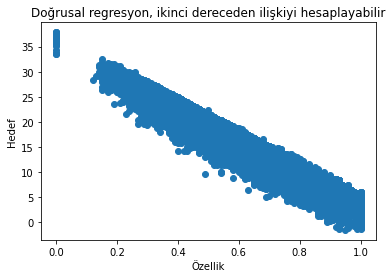

In [5]:
plt.scatter(df["Humidity"], prediction)
plt.xlabel("Özellik")
plt.ylabel("Hedef")
plt.title('Doğrusal regresyon, ikinci dereceden ilişkiyi hesaplayabilir')
plt.show()

# Bu grafiği nasıl yorumlarım?

In [6]:

# Assumption 2 :The error term has a population mean of zero

In [7]:
errors = Y - prediction

print("mean error : {}".format(np.mean(errors)))

mean error : Temperature (C)    3.394587e-16
dtype: float64


# Neden 0 degil ortalama?

In [8]:

# Assumption 3: Homoscedasticity


In [9]:
bart_stats = bartlett(prediction, errors)
lev_stats = levene(prediction, errors)

print("Bartlett: {} p value : {:.5f}".format(int(bart_stats[0]), int(bart_stats[1])))
print("Levene: {} p value : {:.5f}".format(int(lev_stats[0]), int(lev_stats[1])))

ValueError: Samples must be one-dimensional.

In [ ]:

# Assumption 4 :Low multicollinearity

In [ ]:
corr_mat = df1.corr()
corr_mat


All of them are low


In [ ]:
# Assumption 5 :Observations of the error term are uncorrelated with each other


In [ ]:
plt.plot(errors)
plt.show()

In [ ]:
acf_dt=acf(errors)

plt.figure(figsize=(8,5))
plt.plot(acf_dt[1:])
plt.show()

In [ ]:
# Assumption 6 :All independent variables are uncorrelated with the error term - exogeneity

In [ ]:

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test: {} and p value : {:.5f}".format(jb_stats[0], jb_stats[1]))
print("Normal test: {}  and p value : {:.5f}".format(int(norm_stats[0]), int(norm_stats[1])))